# Exploratory Data Analysis on FashionMNIST CSV Dataset

This notebook uses the `FashionMNISTCSVDataset` class to load the FashionMNIST data from CSV files and creates useful visualizations:

- Number of images per class
- Pixel intensity distribution across all classes (combined plot)

Plots will be saved in `reports/figures/`

In [2]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the new DataModule
from dataset import FashionMNISTDataModule

sns.set(style="whitegrid")
FIGURE_DIR = os.path.abspath('reports/figures')

def ensure_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)


### Load the Dataset

We will load the training dataset CSV file without applying any transformations so that the pixel values remain in their original [0, 255] range.


In [ ]:
# 1. Instantiate the DataModule
dm = FashionMNISTDataModule(data_dir="data/")

# 2. Download and prepare the datasets
dm.prepare_data()
dm.setup()

# 3. Use the combined train/validation dataset for analysis
dataset = dm.train_val_dataset

100%|██████████| 26.4M/26.4M [00:09<00:00, 2.68MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 794kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.12MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 22.4MB/s]


### Plot 1: Number of Images per Class

Let's count how many images are present for each class and visualize it as a bar plot.


/tmp/ipykernel_734324/1995024115.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=counts, palette="viridis")


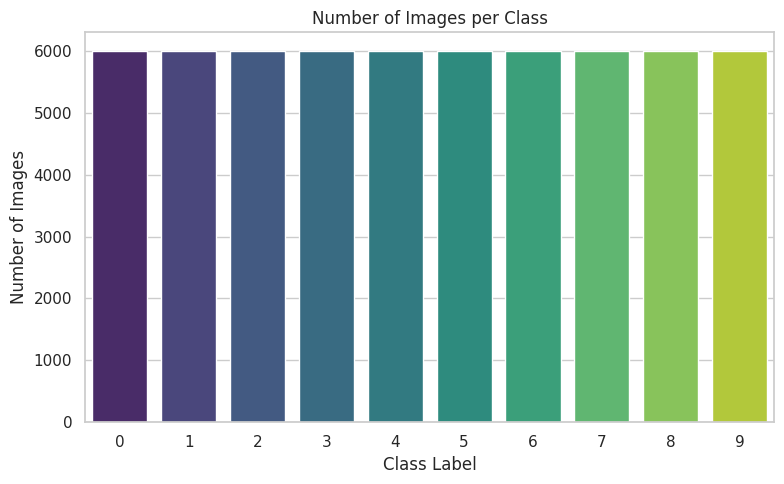

Saved plot: /home/alumno/Desktop/datos/SD/my_project/reports/figures/images_per_class.png


In [4]:
def plot_images_per_class(dataset):
    labels = [label.item() if hasattr(label, 'item') else label for _, label in dataset]
    classes, counts = np.unique(labels, return_counts=True)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=classes, y=counts, palette="viridis")
    plt.title('Number of Images per Class')
    plt.xlabel('Class Label')
    plt.ylabel('Number of Images')
    plt.xticks(classes)
    plt.tight_layout()

    save_path = os.path.join(FIGURE_DIR, 'images_per_class.png')
    ensure_dir(FIGURE_DIR)
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print(f'Saved plot: {save_path}')

plot_images_per_class(dataset)


We can see that the dataset is balanced because each class has the same number of images (all class labels (0 to 9) have equal height). A balanced dataset helps ensure that the model does not become biased toward any particular class during training.

### Plot 2: Pixel Intensity Distribution for All Classes

Next, we visualize the pixel intensity distributions for *all* classes on the same plot using subplots. Each subplot shows the distribution of pixel intensities (values from 0 to 255) for images belonging to a specific class.


In [ ]:
# Subplot distribution for each class
def plot_pixel_distributions_subplots(dataset):
    fig, axes = plt.subplots(2, 5, figsize=(20, 8), sharex=True, sharey=True)
    axes = axes.flatten()

    for class_label in range(10):
        # Get all images for current class
        images = [img.numpy() if hasattr(img, 'numpy') else img for img, label in dataset if label == class_label]
        pixels = np.concatenate([img.flatten() for img in images])
        
        ax = axes[class_label]
        sns.histplot(pixels, bins=50, kde=False, color='skyblue', ax=ax)
        ax.set_title(f'Class {class_label}')
        ax.set_xlabel('')
        ax.set_ylabel('')

    fig.suptitle('Pixel Intensity Distributions per Class', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for title

    save_path = os.path.join(FIGURE_DIR, 'pixel_distributions_per_class.png')
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print(f'Saved: {save_path}')

plot_pixel_distributions_subplots(dataset)

Observations: all classes span a similar overall pixel intensity range — from dark (0) to bright (255), which is expected for grayscale images. However, we can observe some differences in the concentration of low-intensity pixels (near 0) across classes. For example, some classes (like Class 1, Class 5 or Class 7) appear to have a higher peak at intensity 0, suggesting that those images contain more black (background or empty) pixels. This could imply that these classes correspond to garments that occupy less area in the image, leaving more background, or that the clothing items are brighter overall.